In [1]:
import pandas as pd # for data manipulations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np # algebraic
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # for model's performance evaluation
from sklearn.feature_extraction.text import TfidfVectorizer # used for text preprocessing
from sklearn.linear_model import LogisticRegression # machine learning algorithm  for binary classification tasks
from sklearn import svm # machine learning algorithm  for both regression and classification tasks
from sklearn.metrics import precision_score  # for model's performance evaluation
from sklearn.metrics import recall_score # for model's performance evaluation

**LOADING THE DATASET**

In [2]:
df =pd.read_csv('/content/drive/MyDrive/Datasets/mail_data.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# let's find out how many rows and columns that we have in the dataset
df.shape

(5572, 2)

**DATA PREPROCESSING STAGE**

In [5]:
# let's check if there are missing values within the dataset
df.isnull().sum().sum()

0

In [6]:
# let's check for missing values in each of the columns specifically.
# First the category column
df['Category'].isnull().sum()

0

In [7]:
# The message column
df['Message'].isnull().sum()

0

**EDA = EXPLORATORY DATA ANALYSIS**

In [8]:
# let's check how many ham and spam mail exists in the dataset
df.groupby('Category')['Category'].count()

,Category
Category,
ham,4825
spam,747


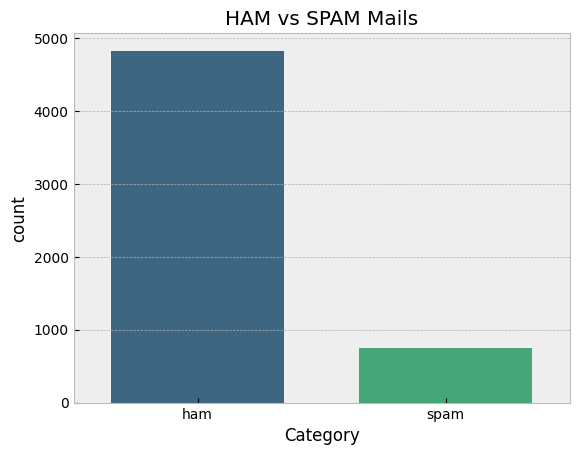

In [9]:
# Let's visualize the reslut using countplot()
plt.style.use('bmh')
sns.countplot(x='Category', data=df, width=0.7, palette='viridis', hue='Category')
plt.title('HAM vs SPAM Mails')
plt.show()

In [10]:
from wordcloud import WordCloud

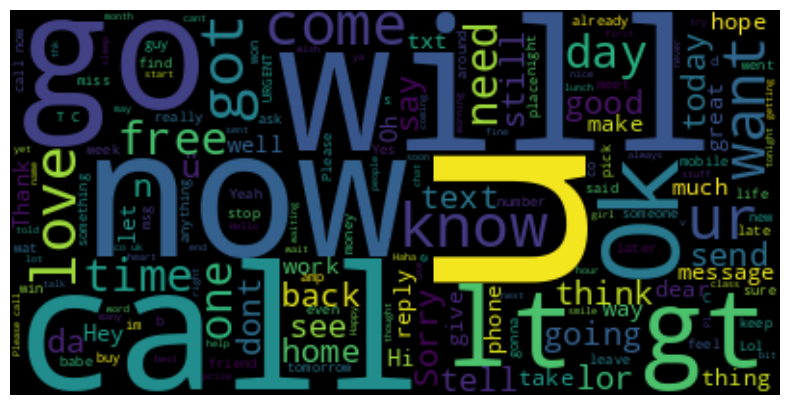

In [11]:
# Combine all the messages into a single string
text = " ".join(message for message in df['Message'])

# Generating the word cloud
wordcloud = WordCloud(width=400, height=200, background_color='black').generate(text)
# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [12]:
# dealing with the imbalance problem using the oversampling method

df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


**DEALING WITH IMBALANCE DATA USING THE OVERSAMPLYING TECHNIQUE**

In [13]:
from imblearn.over_sampling import RandomOverSampler

# Separate features (X) and target variable (y)
x = df['Message']
y = df['Category']

# Initializing RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
x_resampled, y_resampled = oversampler.fit_resample(x.values.reshape(-1, 1), y)

# Creating a new DataFrame with the resampled data
df_resampled = pd.DataFrame({'Message': x_resampled.flatten(), 'Category': y_resampled})

# Displaying the value counts of the resampled target variable
print(df_resampled['Category'].value_counts())



Category
ham     4825
spam    4825
Name: count, dtype: int64


**DATA ENCODE**

In [14]:
# Converting the category column to numerical values: ham==>>1 and spam==>0
mapping = {"ham": 0, "spam": 1}
# Converting categorical string values to numeric values using map() function
df["Category"] = df["Category"].map(mapping)

In [15]:
df_resampled

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
9645,**FREE MESSAGE**Thanks for using the Auction S...,spam
9646,Ur HMV Quiz cash-balance is currently £500 - t...,spam
9647,07732584351 - Rodger Burns - MSG = We tried to...,spam
9648,PRIVATE! Your 2003 Account Statement for 07808...,spam


In [16]:

# Print the first full spam message
spam_message = df[df['Category'] == 1]['Message'].iloc[0:5]
spam_message

,Message
2,Free entry in 2 a wkly comp to win FA Cup fina...
5,FreeMsg Hey there darling it's been 3 week's n...
8,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...
11,"SIX chances to win CASH! From 100 to 20,000 po..."


**DATA SPLITING PHASE**

In [17]:
# Now let's separate the dataset into label and text
x= df_resampled['Message']
y= df_resampled['Category']

In [18]:
# let's print the values in x and y separately and see the content
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
9645    **FREE MESSAGE**Thanks for using the Auction S...
9646    Ur HMV Quiz cash-balance is currently £500 - t...
9647    07732584351 - Rodger Burns - MSG = We tried to...
9648    PRIVATE! Your 2003 Account Statement for 07808...
9649    Dear 0776xxxxxxx U've been invited to XCHAT. T...
Name: Message, Length: 9650, dtype: object


In [19]:
# let's print the values in x and y separately and see the content
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
9645    spam
9646    spam
9647    spam
9648    spam
9649    spam
Name: Category, Length: 9650, dtype: object


**SPLITING THE DATASET INTO TRAINING AND TESTING DATA**

In [20]:
# Now, let's split our x and y data into training and testing data using the train_test_split() function
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
# After the splitting, let's print the shape of the x_train, x_test and y_train, y_test
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(1930,)

Convert the message Variable into Numerical values using TFifVectorier

In [22]:
# Now, let us convert our text data stored in the variable x to numerical data using the TfidfVectorizer

#setting the parameters for the TFidvectorier
vectorizer= TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

x_train_converted=vectorizer.fit_transform(x_train)
x_test_converted=vectorizer.transform(x_test)

In [23]:
print(x_train_converted)

  (0, 3352)	0.41227721727271605
  (0, 2685)	0.4960775853048726
  (0, 6359)	0.4278141070858459
  (0, 3258)	0.26294362471648375
  (0, 4158)	0.26242880870137275
  (0, 4443)	0.5127391011409487
  (1, 4320)	0.28889796764744563
  (1, 405)	0.25559820442037273
  (1, 3773)	0.23240546092935951
  (1, 3062)	0.1999410611069097
  (1, 5740)	0.13574470230600685
  (1, 7693)	0.1760684176432133
  (1, 813)	0.5777959352948913
  (1, 7642)	0.14051647217518703
  (1, 6280)	0.1696449469827294
  (1, 861)	0.21410844700835957
  (1, 3502)	0.28889796764744563
  (1, 6505)	0.2686924056732032
  (1, 6031)	0.14209199856630608
  (1, 3069)	0.22653289263493995
  (1, 653)	0.2289373169931449
  (2, 3563)	0.4554900131068639
  (2, 7476)	0.4537652214097056
  (2, 3357)	0.5217868977427962
  (2, 2195)	0.5606820891939199
  :	:
  (7716, 6337)	0.5852486207553731
  (7717, 4876)	0.47595649880691493
  (7717, 6961)	0.41300772853885526
  (7717, 6050)	0.5437799095422345
  (7717, 3892)	0.5542503381946444
  (7718, 2365)	0.3277515574910802
  (77

In [24]:
print(x_test_converted)

  (0, 1724)	0.5013233723527114
  (0, 1899)	0.5563873347088651
  (0, 2452)	0.3748766455304818
  (0, 3458)	0.3041589076303658
  (0, 7147)	0.4539414826311713
  (1, 2395)	0.6496076225108823
  (1, 4944)	0.4394775208334708
  (1, 7670)	0.6203784695311608
  (2, 1668)	0.4283706680558398
  (2, 3097)	0.38176259464061507
  (2, 3746)	0.5818610521664163
  (2, 4598)	0.4964668642988466
  (2, 4944)	0.2927699791777164
  (3, 294)	0.20593709802601096
  (3, 1664)	0.29123306102931645
  (3, 1676)	0.21771077481503226
  (3, 1682)	0.1970711216602762
  (3, 3039)	0.2535545751399855
  (3, 4075)	0.19042851491927268
  (3, 4578)	0.1482547728363291
  (3, 4658)	0.28645498799795416
  (3, 4994)	0.22348407908873638
  (3, 5002)	0.199905506354716
  (3, 5018)	0.32476871048957623
  (3, 5212)	0.23694320418099804
  :	:
  (1926, 4464)	0.2703581662524189
  (1926, 4529)	0.23395853405658987
  (1926, 4647)	0.138812973417761
  (1926, 5278)	0.16529258969388028
  (1927, 1)	0.31212404365357116
  (1927, 183)	0.5800648109845269
  (1927, 5

**MODEL TRAINING**

In [25]:
classifier = LogisticRegression()

In [26]:
model = classifier.fit(x_train_converted, y_train)

**Evaluating the train model using the x_train**

In [27]:
y_predict = model.predict(x_train_converted)
print(y_predict)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'spam']


**Accuracy**

In [28]:
train_accuarcy = accuracy_score(y_predict, y_train)
print(round(train_accuarcy,2))

1.0


**Evaluating the model using Test Data**

In [29]:
#Evaluating the model using Test Data
y_predict_test = model.predict(x_test_converted)
print(y_predict_test)

['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']


In [30]:
test_accuarcy = accuracy_score(y_predict_test , y_test)
print(round(test_accuarcy,2))

0.99


**BUILDING TH PREDICTIVE MODEL INTERFACE**

In [31]:
email=["Hi Jeremiah,Imagine if you could forecast 📈market trends, 🔄automate processes, 📶scale solutions faster, and drive smarter business decisions. AI makes it all possible todayJoin us for a Live Webinar featuring the most sought-after MBA-AI in Business and discover how to turn AI insights into winning strategies.AI is the future of leadership, and you can be the next AI Strategist.The wait is almost over: 📅 November 16; 10:00am to 12:00pm GMT"]

# Now let's transform the email to numeric data
email_input=vectorizer.transform(email)

# making Prediction
prediction =model.predict(email_input)
if(prediction==1):
    print(f"The result of the prediction is {prediction}")
else:
    print(f"The result of the prediction is {prediction}")

The result of the prediction is ['ham']


In [32]:
import pickle
# Save the model to a pickle file
with open('spamDetection_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the vectorizer to a pickle file
with open('vectorizer.pkl', 'wb') as file:
  pickle.dump(vectorizer, file)

In [33]:
from sklearn.metrics import classification_report

# Assuming you have a trained model
y_pred = classifier.predict(x_test_converted)  # Predict on test set

# Printing classification metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       990
        spam       0.99      0.99      0.99       940

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [34]:

probabilities = classifier.predict_proba(x_test_converted)  # Probabilities for each class
print(probabilities[:10])  # Inspect first 10 predictions


[[0.82569323 0.17430677]
 [0.9774954  0.0225046 ]
 [0.89459615 0.10540385]
 [0.02420537 0.97579463]
 [0.89177607 0.10822393]
 [0.10955625 0.89044375]
 [0.24435086 0.75564914]
 [0.97838742 0.02161258]
 [0.04179712 0.95820288]
 [0.99129129 0.00870871]]
